In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataframes=pd.read_csv(r"C:\Users\16326\Desktop\label\labels.csv")

In [3]:
dataframes

Stock Code  Year  Week  Rise    Return
0     000001.SS  2015    15   1.0  0.040173
1     000001.SS  2015    16   1.0  0.041879
2     000001.SS  2015    17   0.0 -0.018938
3     000001.SS  2015    18   0.0 -0.061276
4     000001.SS  2015    19   0.0 -0.005744
...         ...   ...   ...   ...       ...
4932  ^STOXX50E  2019    52   1.0  0.006643
4933  ^STOXX50E  2019     6   1.0  0.023894
4934  ^STOXX50E  2019     7   1.0  0.007939
4935  ^STOXX50E  2019     8   1.0  0.009784
4936  ^STOXX50E  2019     9   0.0 -0.010105

[4937 rows x 5 columns]

In [4]:
df = dataframes

dataframes = []

# split DataFrame
for stock_code in df['Stock Code'].unique():
    df_stock = df[df['Stock Code'] == stock_code]
    # order by 'year' and 'month'
    df_stock.sort_values(by=['Year', 'Week'], inplace=True)
    dataframes.append(df_stock)


C:\Users\16326\AppData\Local\Temp\ipykernel_13336\3138768431.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock.sort_values(by=['Year', 'Week'], inplace=True)


In [5]:
for idx, data_df in enumerate(dataframes):
    print(data_df.head())

  Stock Code  Year  Week  Rise    Return
0  000001.SS  2015    15   1.0  0.040173
1  000001.SS  2015    16   1.0  0.041879
2  000001.SS  2015    17   0.0 -0.018938
3  000001.SS  2015    18   0.0 -0.061276
4  000001.SS  2015    19   0.0 -0.005744
    Stock Code  Year  Week  Rise    Return
239  399001.SZ  2015    15   0.0 -0.000012
240  399001.SZ  2015    16   1.0  0.052416
241  399001.SZ  2015    17   1.0  0.000623
242  399001.SZ  2015    18   0.0 -0.025523
243  399001.SZ  2015    19   0.0 -0.016723
    Stock Code  Year  Week  Rise    Return
478        IWM  2015    14   1.0  0.003355
479        IWM  2015    15   0.0 -0.010104
480        IWM  2015    16   1.0  0.001671
481        IWM  2015    17   0.0 -0.020085
482        IWM  2015    18   1.0  0.001878
    Stock Code  Year  Week  Rise    Return
726      ^AORD  2015    14   1.0  0.007161
727      ^AORD  2015    15   0.0 -0.012922
728      ^AORD  2015    16   1.0  0.017221
729      ^AORD  2015    17   0.0 -0.026197
730      ^AORD  2015   

In [6]:
import pandas as pd

# SStatistics Analysis
statistics_list = []

for data_df in dataframes:
    stock_code = data_df['Stock Code'].unique()[0]
    
    statistics = {
        'Stock Code': stock_code,
        'Mean': data_df['Return'].mean(),
        'Sd': data_df['Return'].std(),
        'Skewness': data_df['Return'].skew(),
        'Kurtosis': data_df['Return'].kurtosis(),
        'Autocorrelation': data_df['Return'].autocorr(lag=1),
    }
    
    statistics_list.append(statistics)

statistics_df = pd.DataFrame(statistics_list)
print(statistics_df)

   Stock Code      Mean        Sd  Skewness  Kurtosis  Autocorrelation
0   000001.SS -0.001814  0.025761 -0.991446  5.226828        -0.104707
1   399001.SZ -0.002115  0.029194 -0.688693  3.094550        -0.062350
2         IWM  0.001686  0.020746 -0.215361  1.288939         0.003377
3       ^AORD  0.000550  0.015999 -0.286957  1.155836        -0.177305
4       ^AXJO  0.000392  0.016567 -0.242330  1.124811        -0.168985
5       ^BVSP  0.003399  0.027565  0.315999  2.904200        -0.112794
6        ^DJI  0.002087  0.017040 -0.468166  2.152817        -0.081982
7       ^FCHI  0.001415  0.020521 -0.357420  0.789082        -0.088553
8       ^FTSE  0.001137  0.017135  0.464943  4.568726        -0.038752
9      ^GDAXI  0.000508  0.021743 -0.373330  0.916433        -0.051195
10      ^GSPC  0.001957  0.016772 -0.508183  2.414093        -0.103699
11    ^GSPTSE  0.000762  0.014181  0.124455  2.860787        -0.031176
12       ^HSI  0.000875  0.020756 -0.071465  1.298503        -0.123383
13    

In [7]:
# Setting the Seaborn Style
sns.set_style("whitegrid")
sns.set_context("notebook")

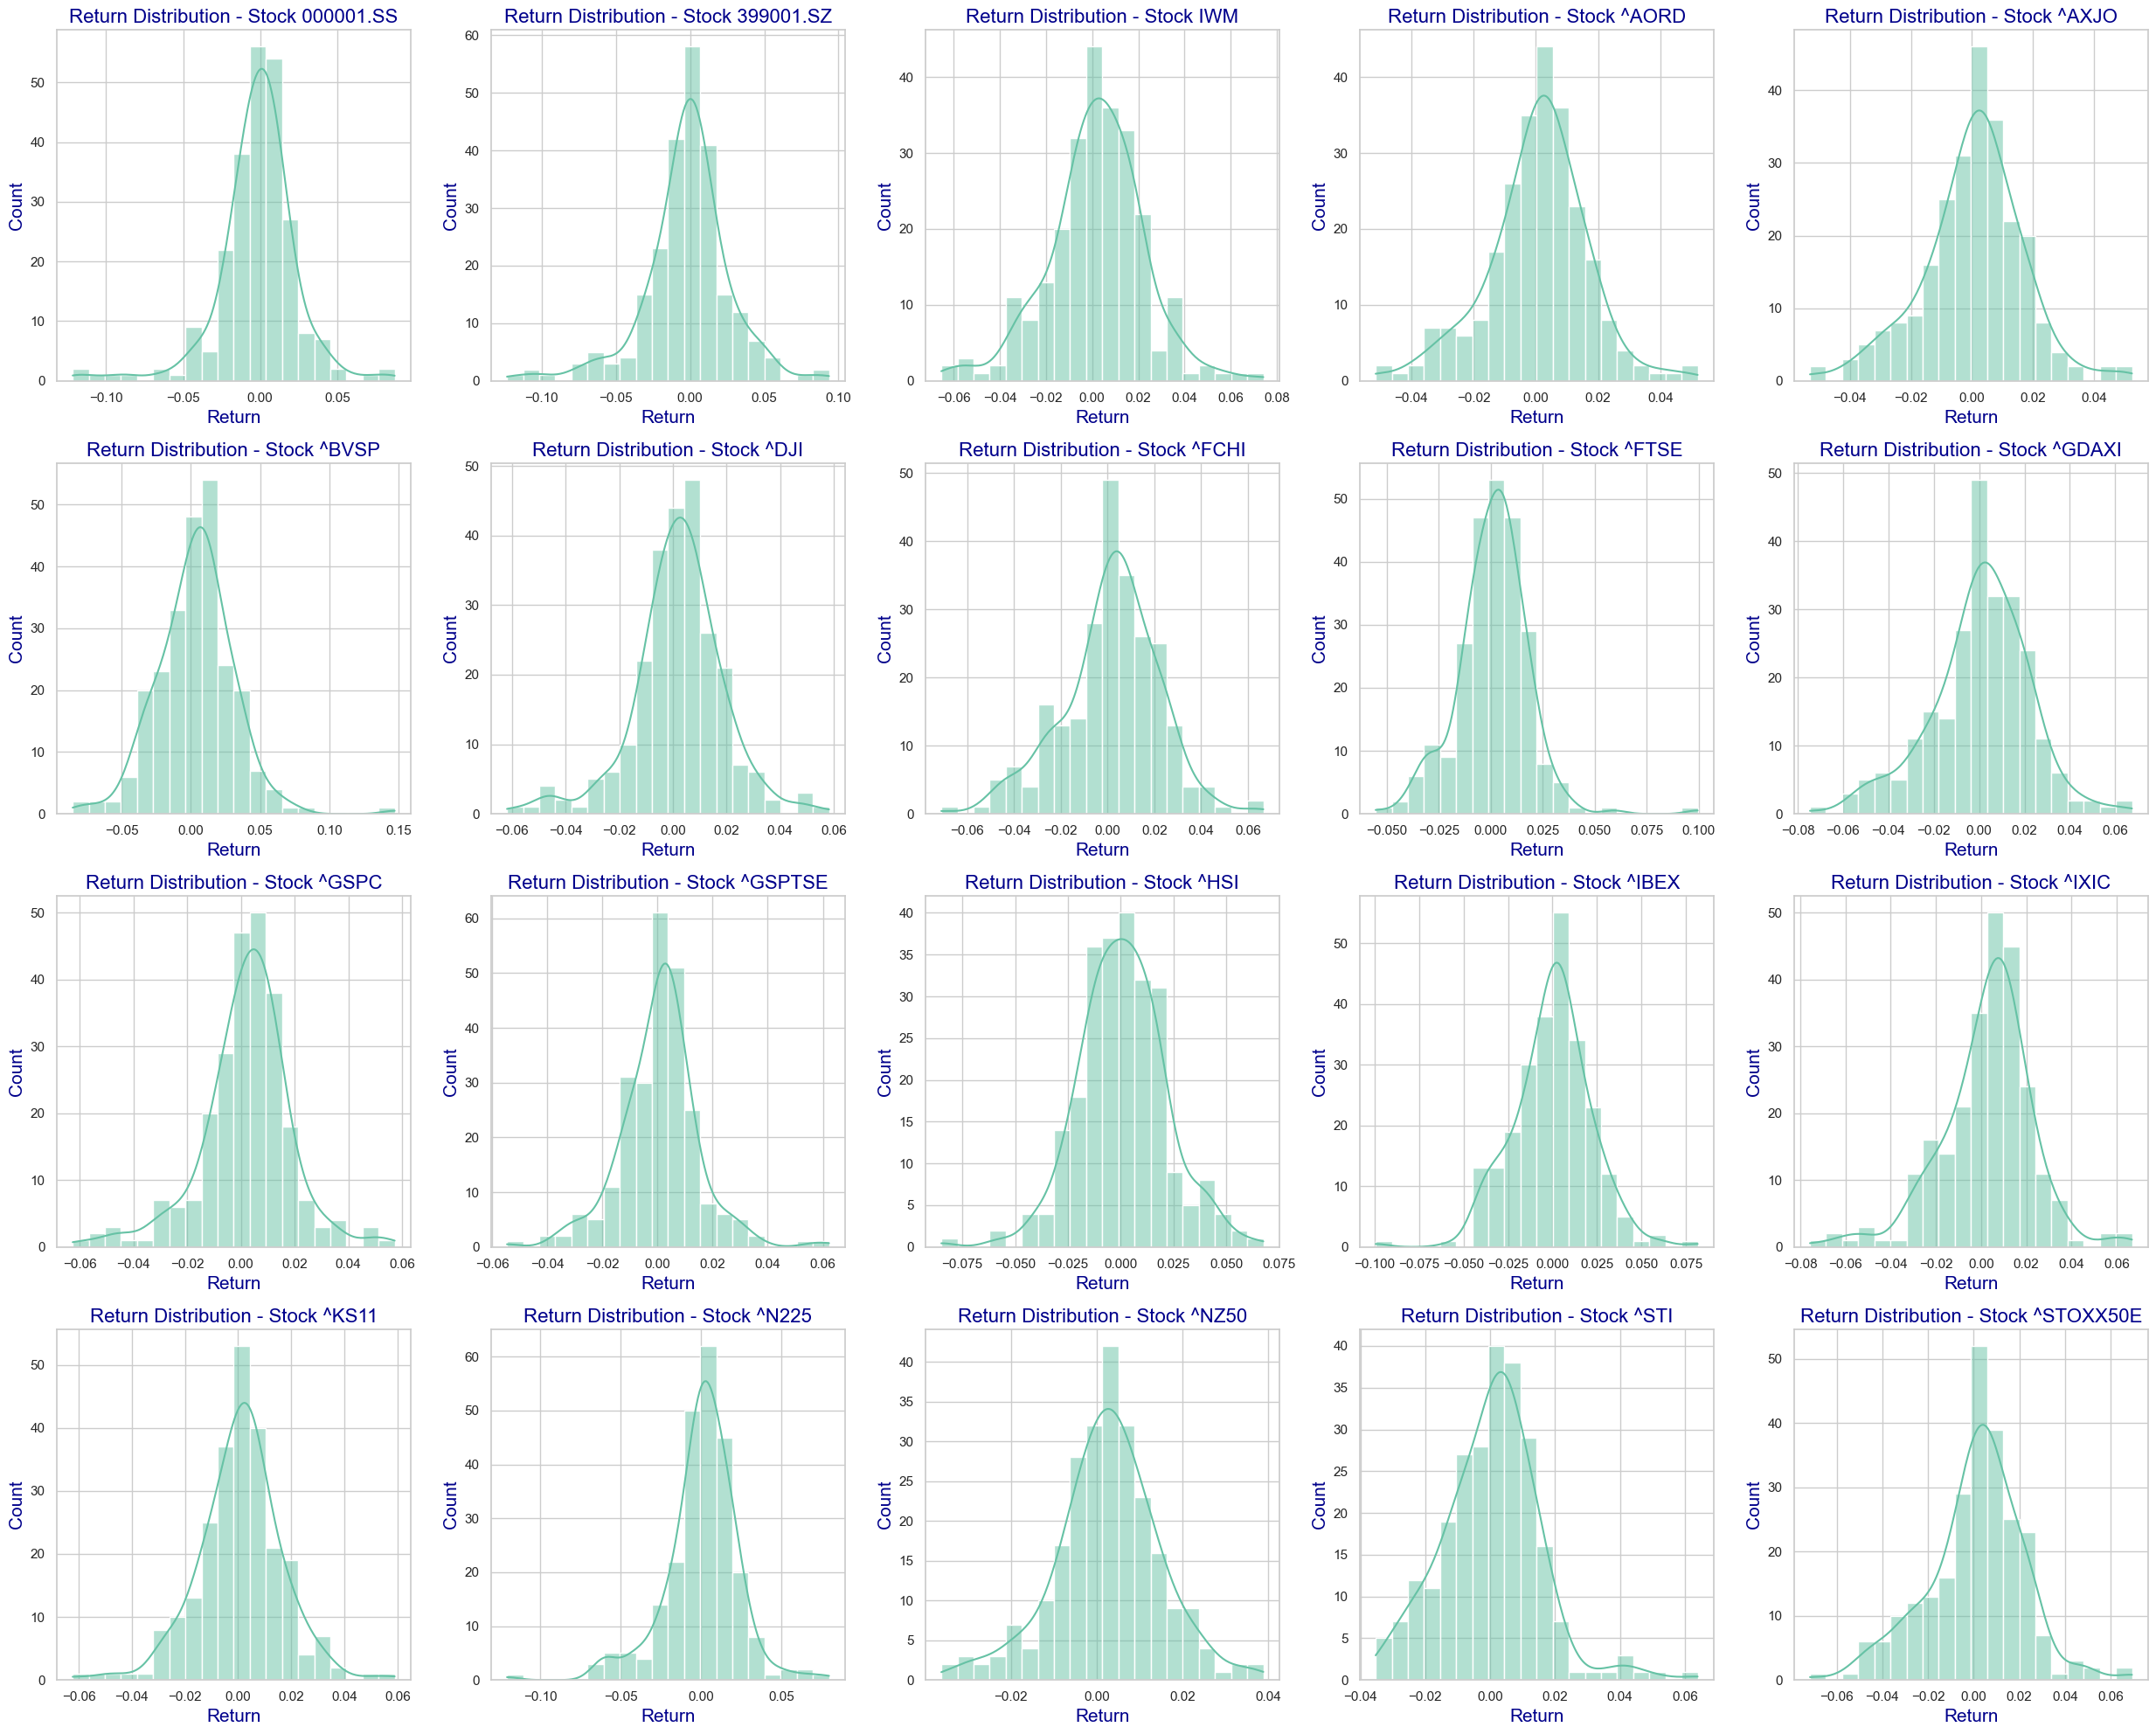

In [8]:
num_dataframes = len(dataframes)
rows = 4 
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
axes = axes.flatten() if num_dataframes > 1 else [axes]  # Ensure that axes is an iterable object

for idx, data_df in enumerate(dataframes):
    df_cp = data_df.copy()
    stock_code = df_cp['Stock Code'].unique()[0]
    
    ax = axes[idx]
    sns.histplot(df_cp['Return'], bins=20, kde=True, ax=ax, color='#66c2a5')
    
    ax.set_title(f'Return Distribution - Stock {stock_code}', fontsize=16, color='darkblue')
    ax.set_xlabel('Return', fontsize=15, color='darkblue')
    ax.set_ylabel('Count', fontsize=15, color='darkblue')

    ax.yaxis.grid(True)
    ax.set_axisbelow(True)

for j in range(num_dataframes, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


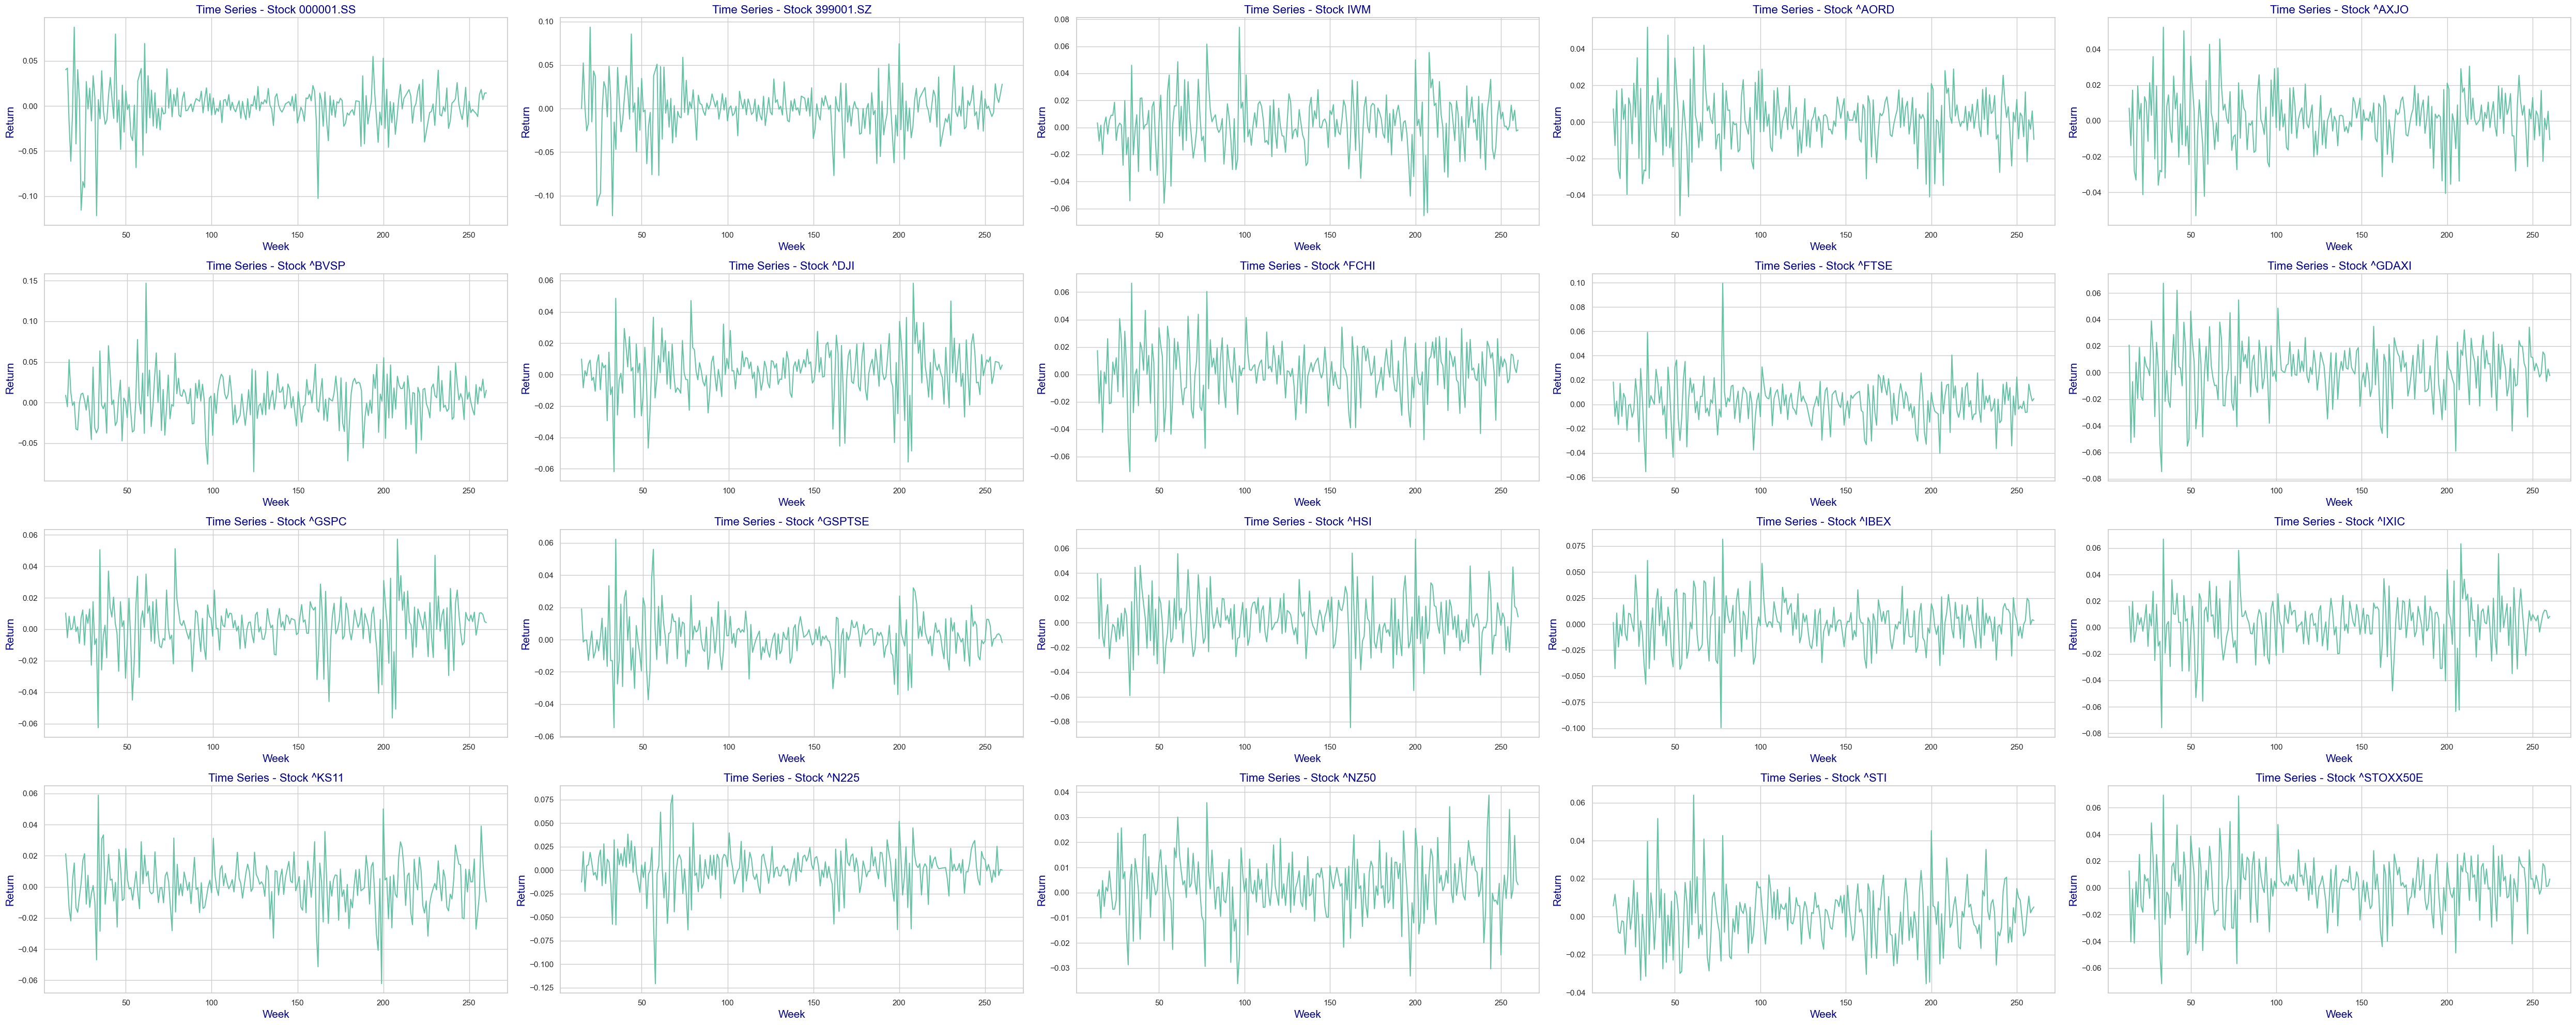

In [9]:
num_dataframes = len(dataframes)
rows = 4 
cols = 5


fig, axes = plt.subplots(rows, cols, figsize=(cols * 10, rows * 5))
axes = axes.flatten() if num_dataframes > 1 else [axes]  # Ensure that axes is an iterable object

for idx, data_df in enumerate(dataframes):
    df_cp = data_df.copy()
    stock_code = df_cp['Stock Code'].unique()[0]
    
    # Calculation of the number of consecutive weeks
    df_cp['Continuous Week'] = (df_cp['Year'] - df_cp['Year'].min()) * 52 + df_cp['Week']
    
    ax = axes[idx]
    
    sns.lineplot(x='Continuous Week', y='Return', data=df_cp, ax=ax, color='#66c2a5')
    
    ax.set_title(f'Time Series - Stock {stock_code}', fontsize=16, color='darkblue')
    ax.set_xlabel('Week', fontsize=15, color='darkblue')
    ax.set_ylabel('Return', fontsize=15, color='darkblue')

    ax.yaxis.grid(True)
    ax.set_axisbelow(True)

for j in range(num_dataframes, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


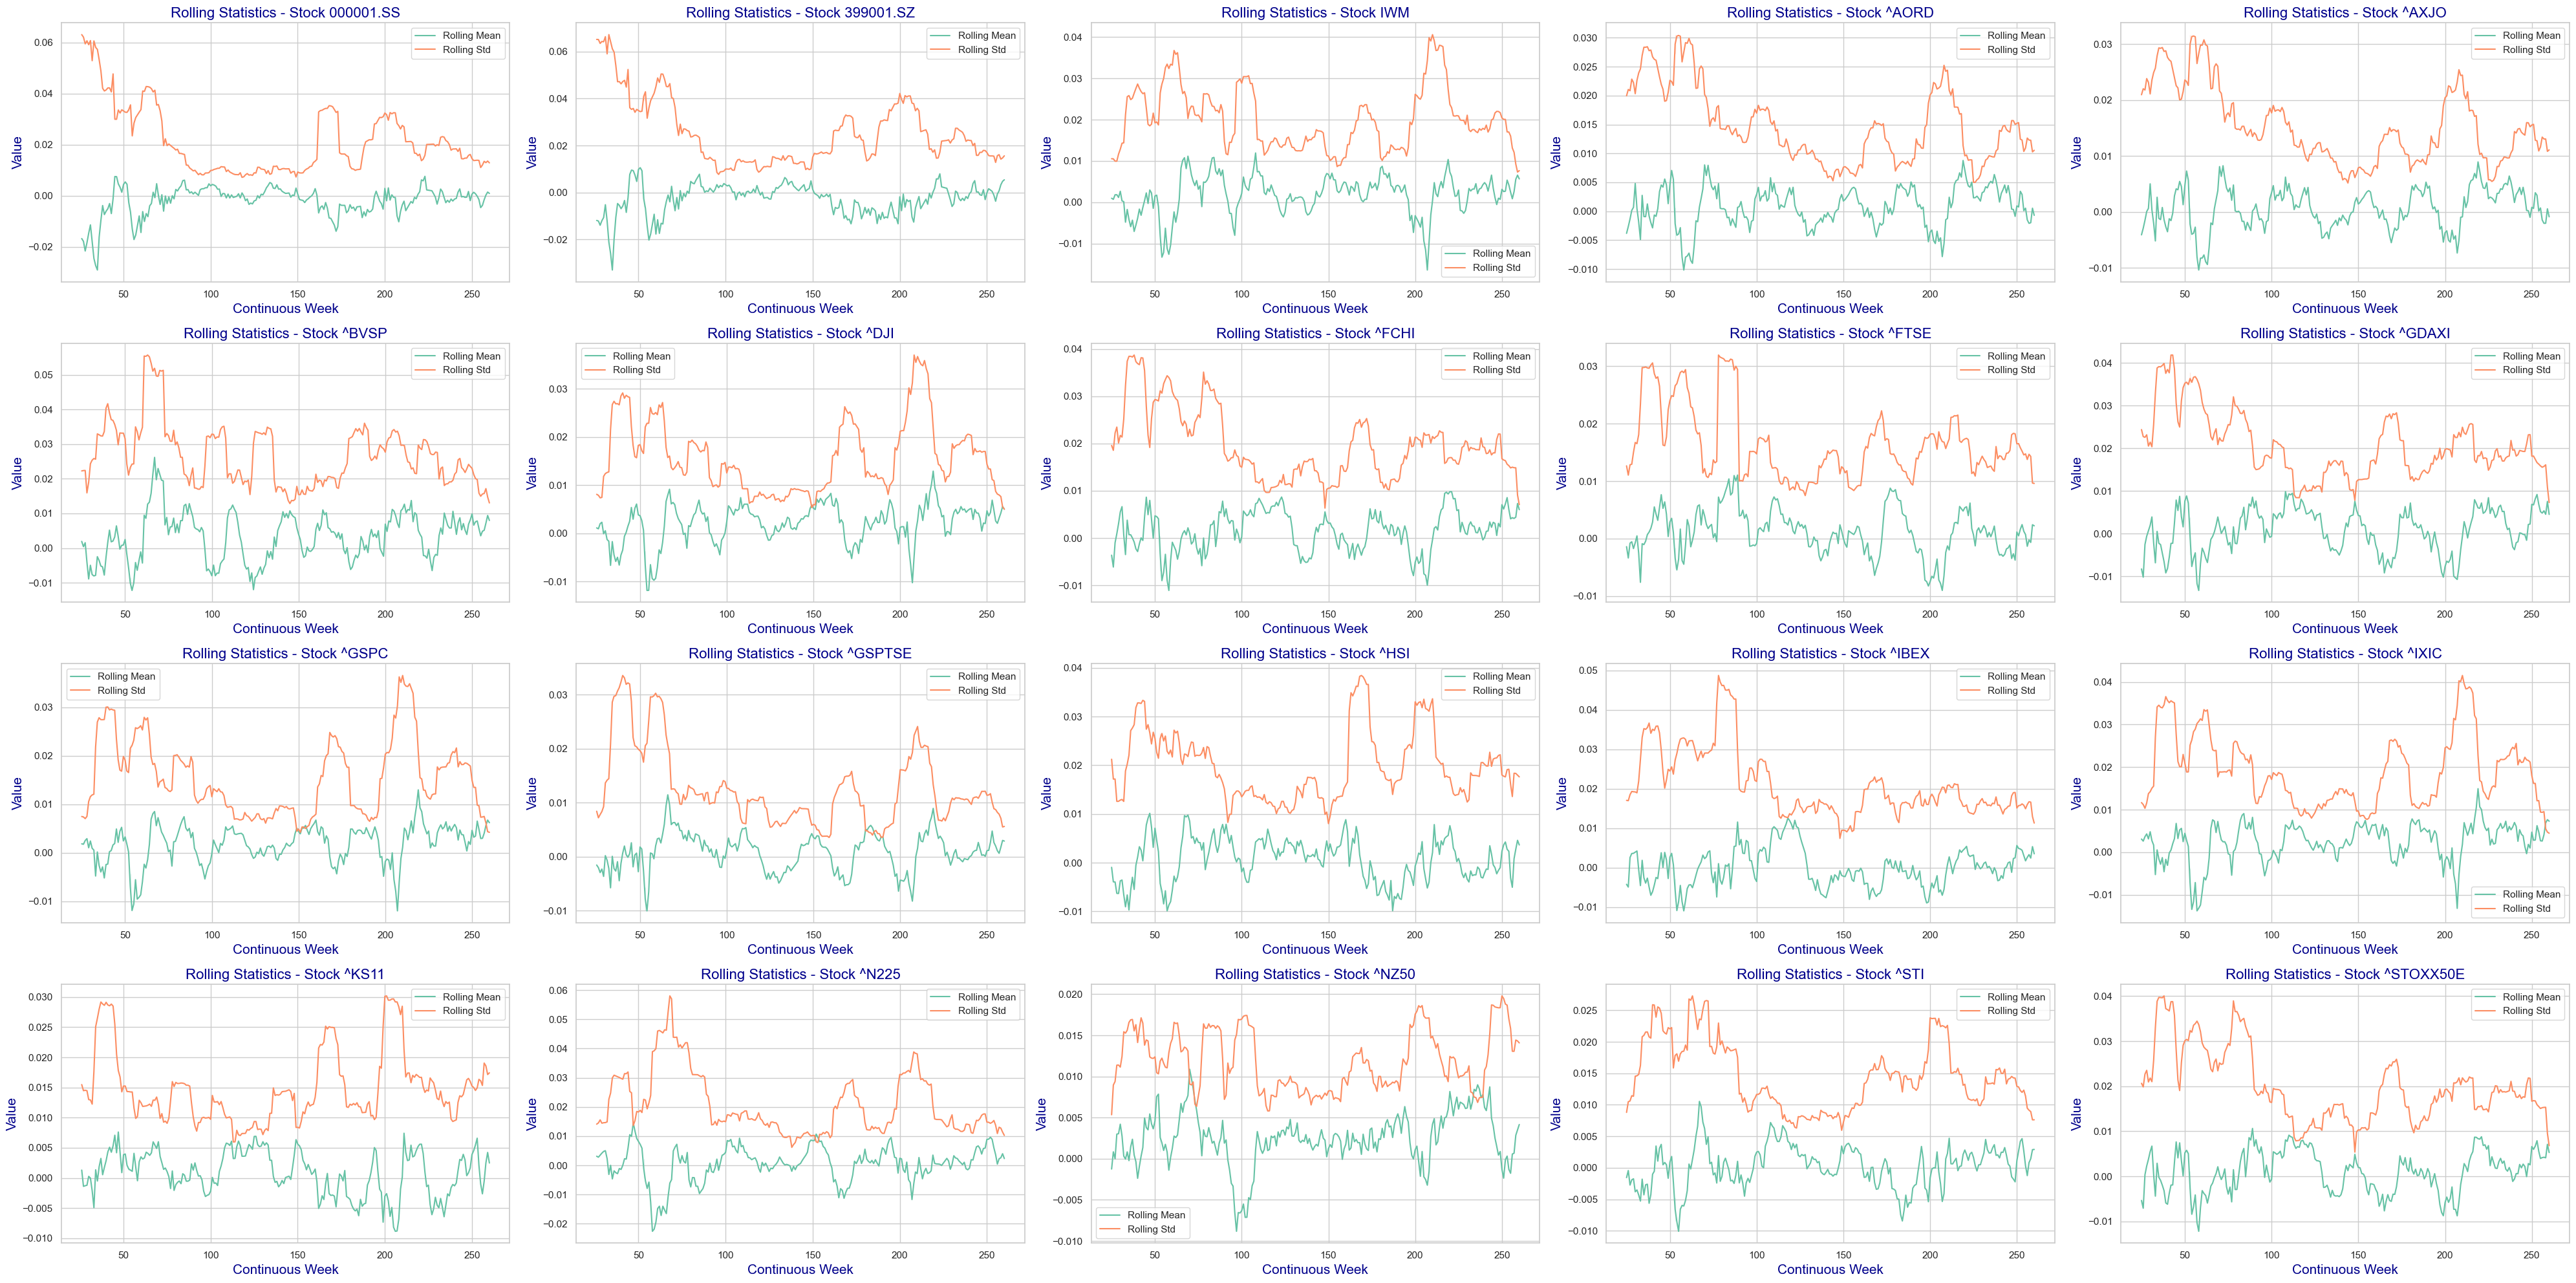

In [10]:
num_dataframes = len(dataframes)
rows = 4 
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(cols * 8, rows * 5))
axes = axes.flatten() if num_dataframes > 1 else [axes]  # Ensure that axes is an iterable object

# Define rolling window size
window = 12

for idx, data_df in enumerate(dataframes):
    df_cp = data_df.copy()
    stock_code = df_cp['Stock Code'].unique()[0]
    
    # Calculation of the number of consecutive weeks
    df_cp['Continuous Week'] = (df_cp['Year'] - df_cp['Year'].min()) * 52 + df_cp['Week']
    
    # Calculate rolling mean and rolling standard deviation
    df_cp['Rolling Mean'] = df_cp['Return'].rolling(window=window).mean()
    df_cp['Rolling Std'] = df_cp['Return'].rolling(window=window).std()
    
    ax = axes[idx]
    
    sns.lineplot(x='Continuous Week', y='Rolling Mean', data=df_cp, ax=ax, label='Rolling Mean', color='#66c2a5', errorbar=('ci', 95))
    sns.lineplot(x='Continuous Week', y='Rolling Std', data=df_cp, ax=ax, label='Rolling Std', color='#fc8d62')
    
    ax.set_title(f'Rolling Statistics - Stock {stock_code}', fontsize=16, color='darkblue')
    ax.set_xlabel('Continuous Week', fontsize=15, color='darkblue')
    ax.set_ylabel('Value', fontsize=15, color='darkblue')

    ax.yaxis.grid(True)
    ax.set_axisbelow(True)
    ax.legend()

for j in range(num_dataframes, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

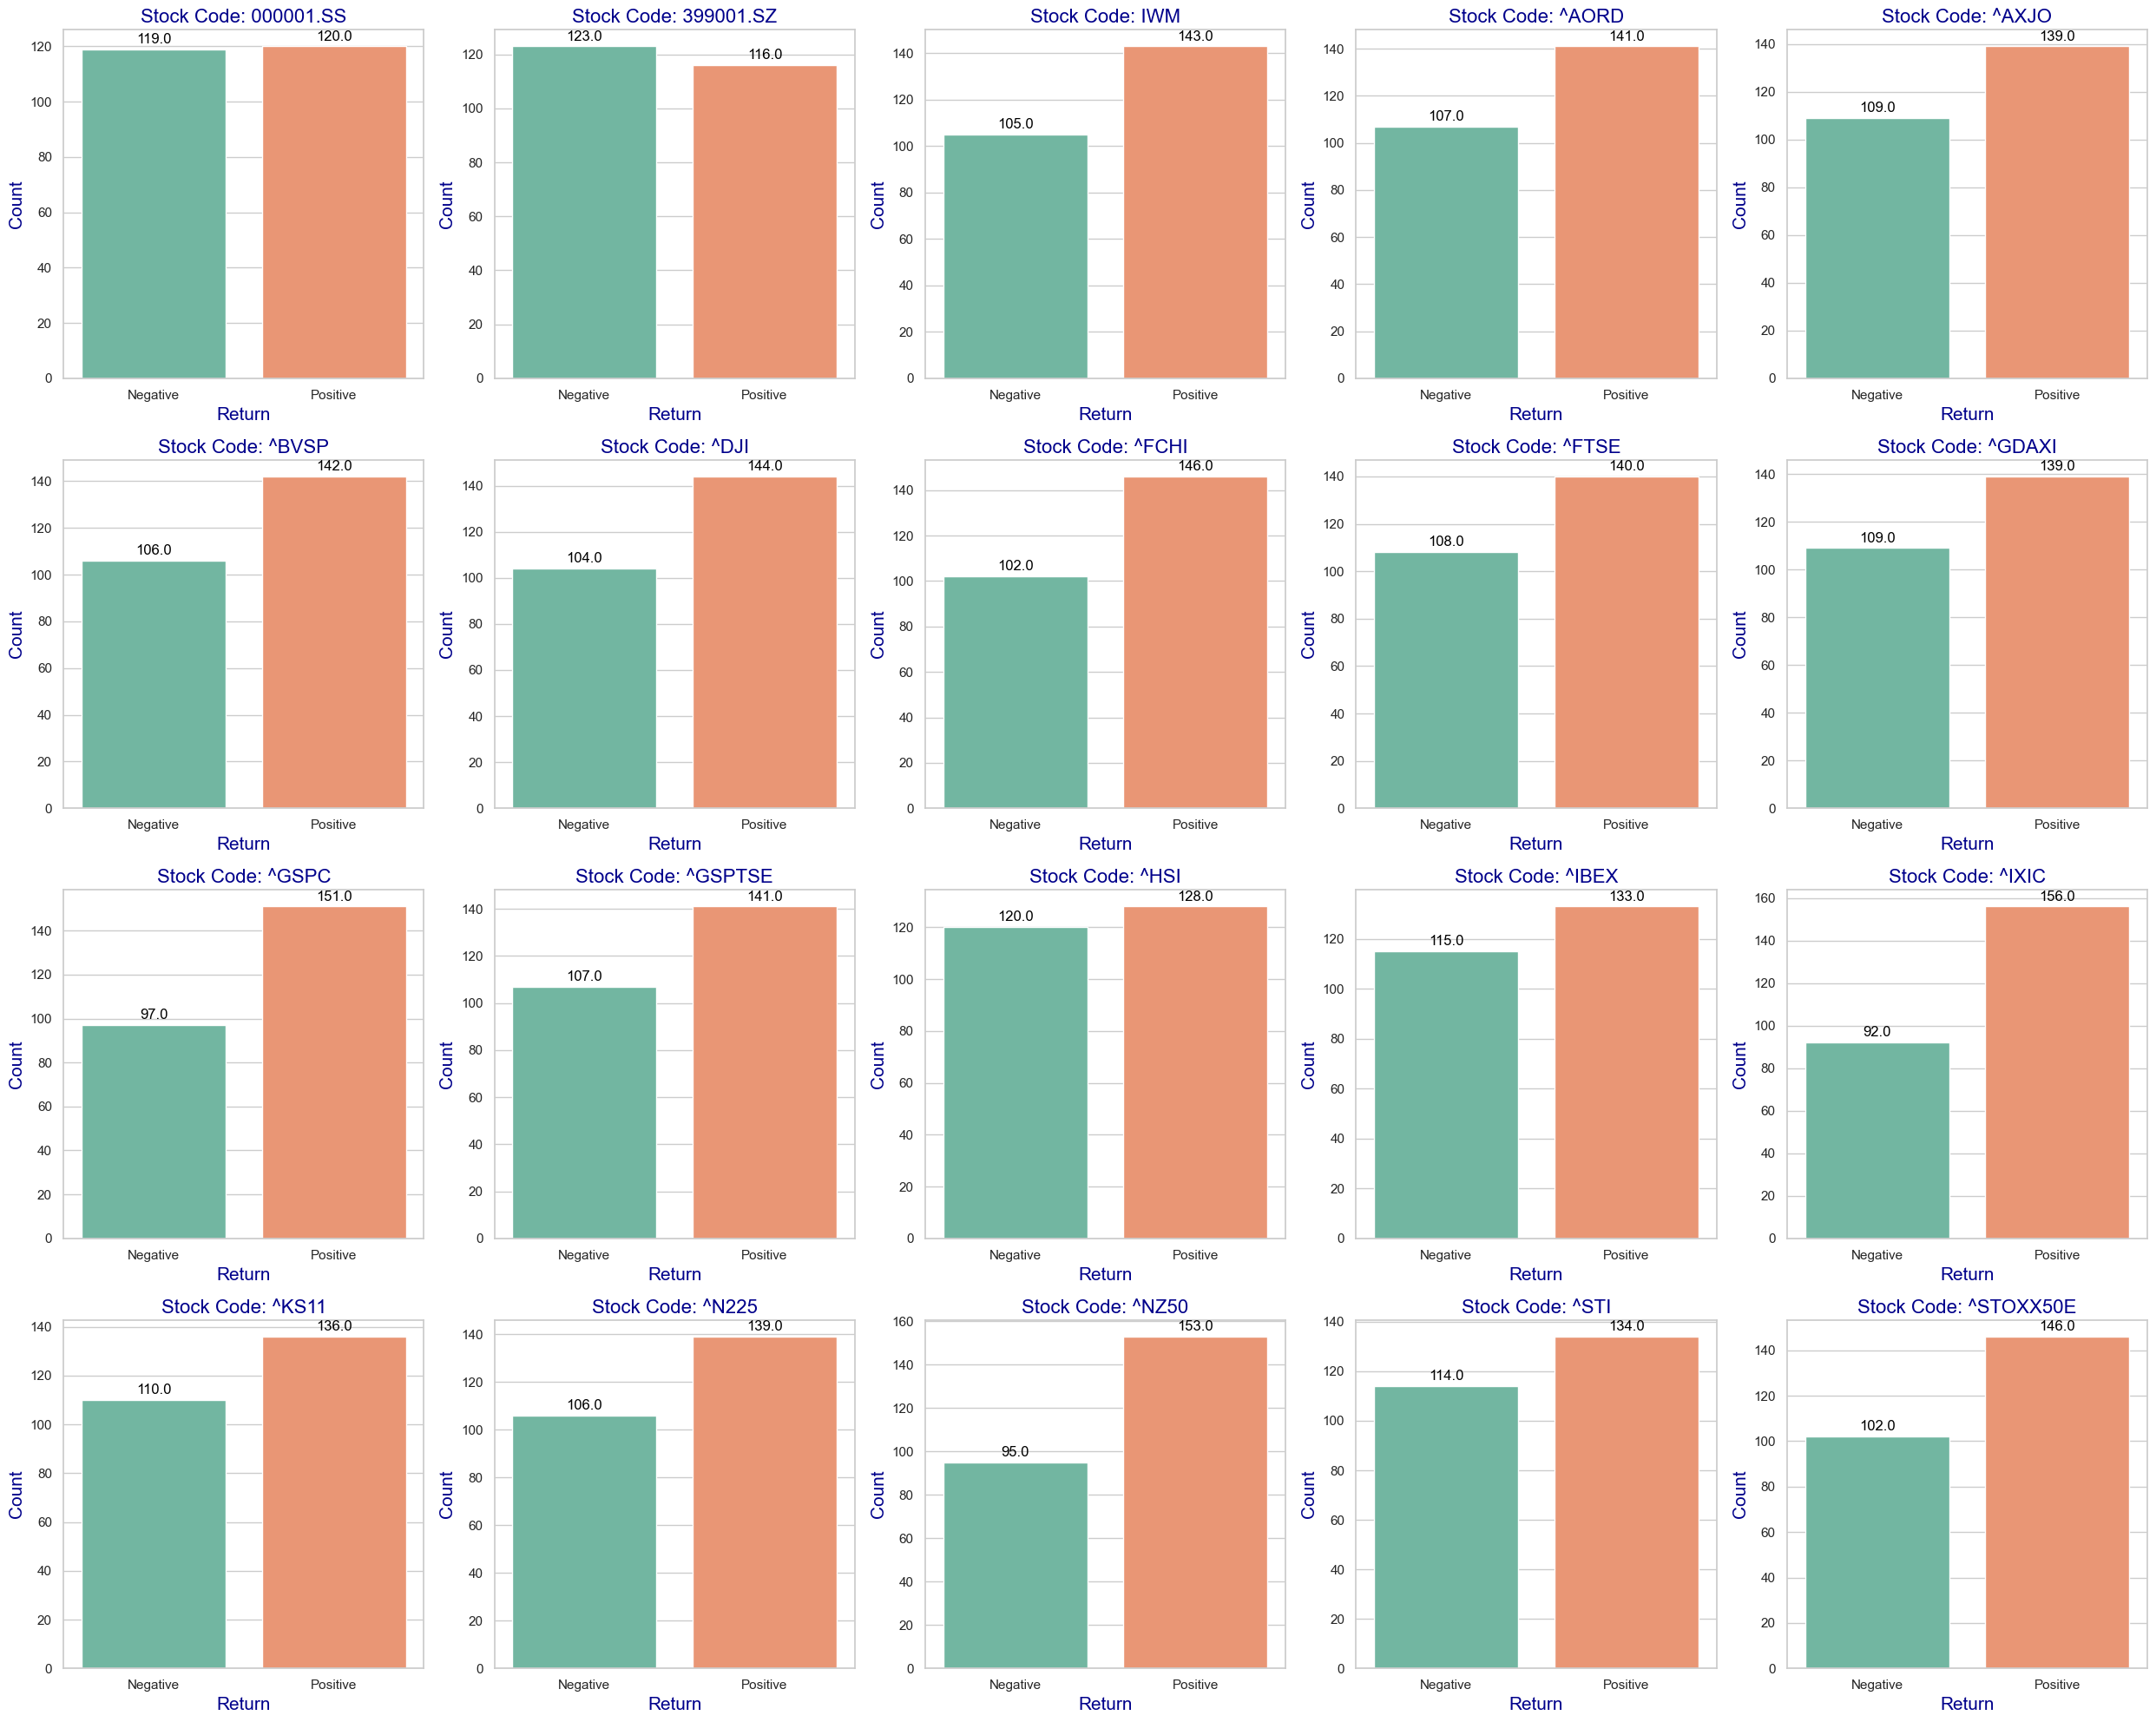

In [11]:
num_dataframes = len(dataframes)
rows, cols = 4, 5

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
axes = axes.flatten() if num_dataframes > 1 else [axes]

for idx, data_df in enumerate(dataframes):
    df_cp = data_df.copy()
    df_cp['Rise'] = df_cp['Rise'].replace({0: 'Negative', 1: 'Positive'})
    
    ax = axes[idx]
    # Use the `hue` parameter and set `legend=False`.
    bar = sns.countplot(x='Rise', data=df_cp, hue='Rise', palette=['#66c2a5', '#fc8d62'], ax=ax, order=['Negative', 'Positive'], hue_order=['Negative', 'Positive'], legend=False)
    
    for p in bar.patches:
        height = p.get_height()
        ax.annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2, height), 
                    xytext=(0, 5), textcoords='offset points', ha='center', fontsize=12, color='black')
    
    stock_code = data_df['Stock Code'].iloc[0]
    ax.set_title(f'Stock Code: {stock_code}', fontsize=16, color='darkblue')
    ax.set_xlabel('Return', fontsize=15, color='darkblue')
    ax.set_ylabel('Count', fontsize=15, color='darkblue')

    ax.yaxis.grid(True)
    ax.set_axisbelow(True)

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


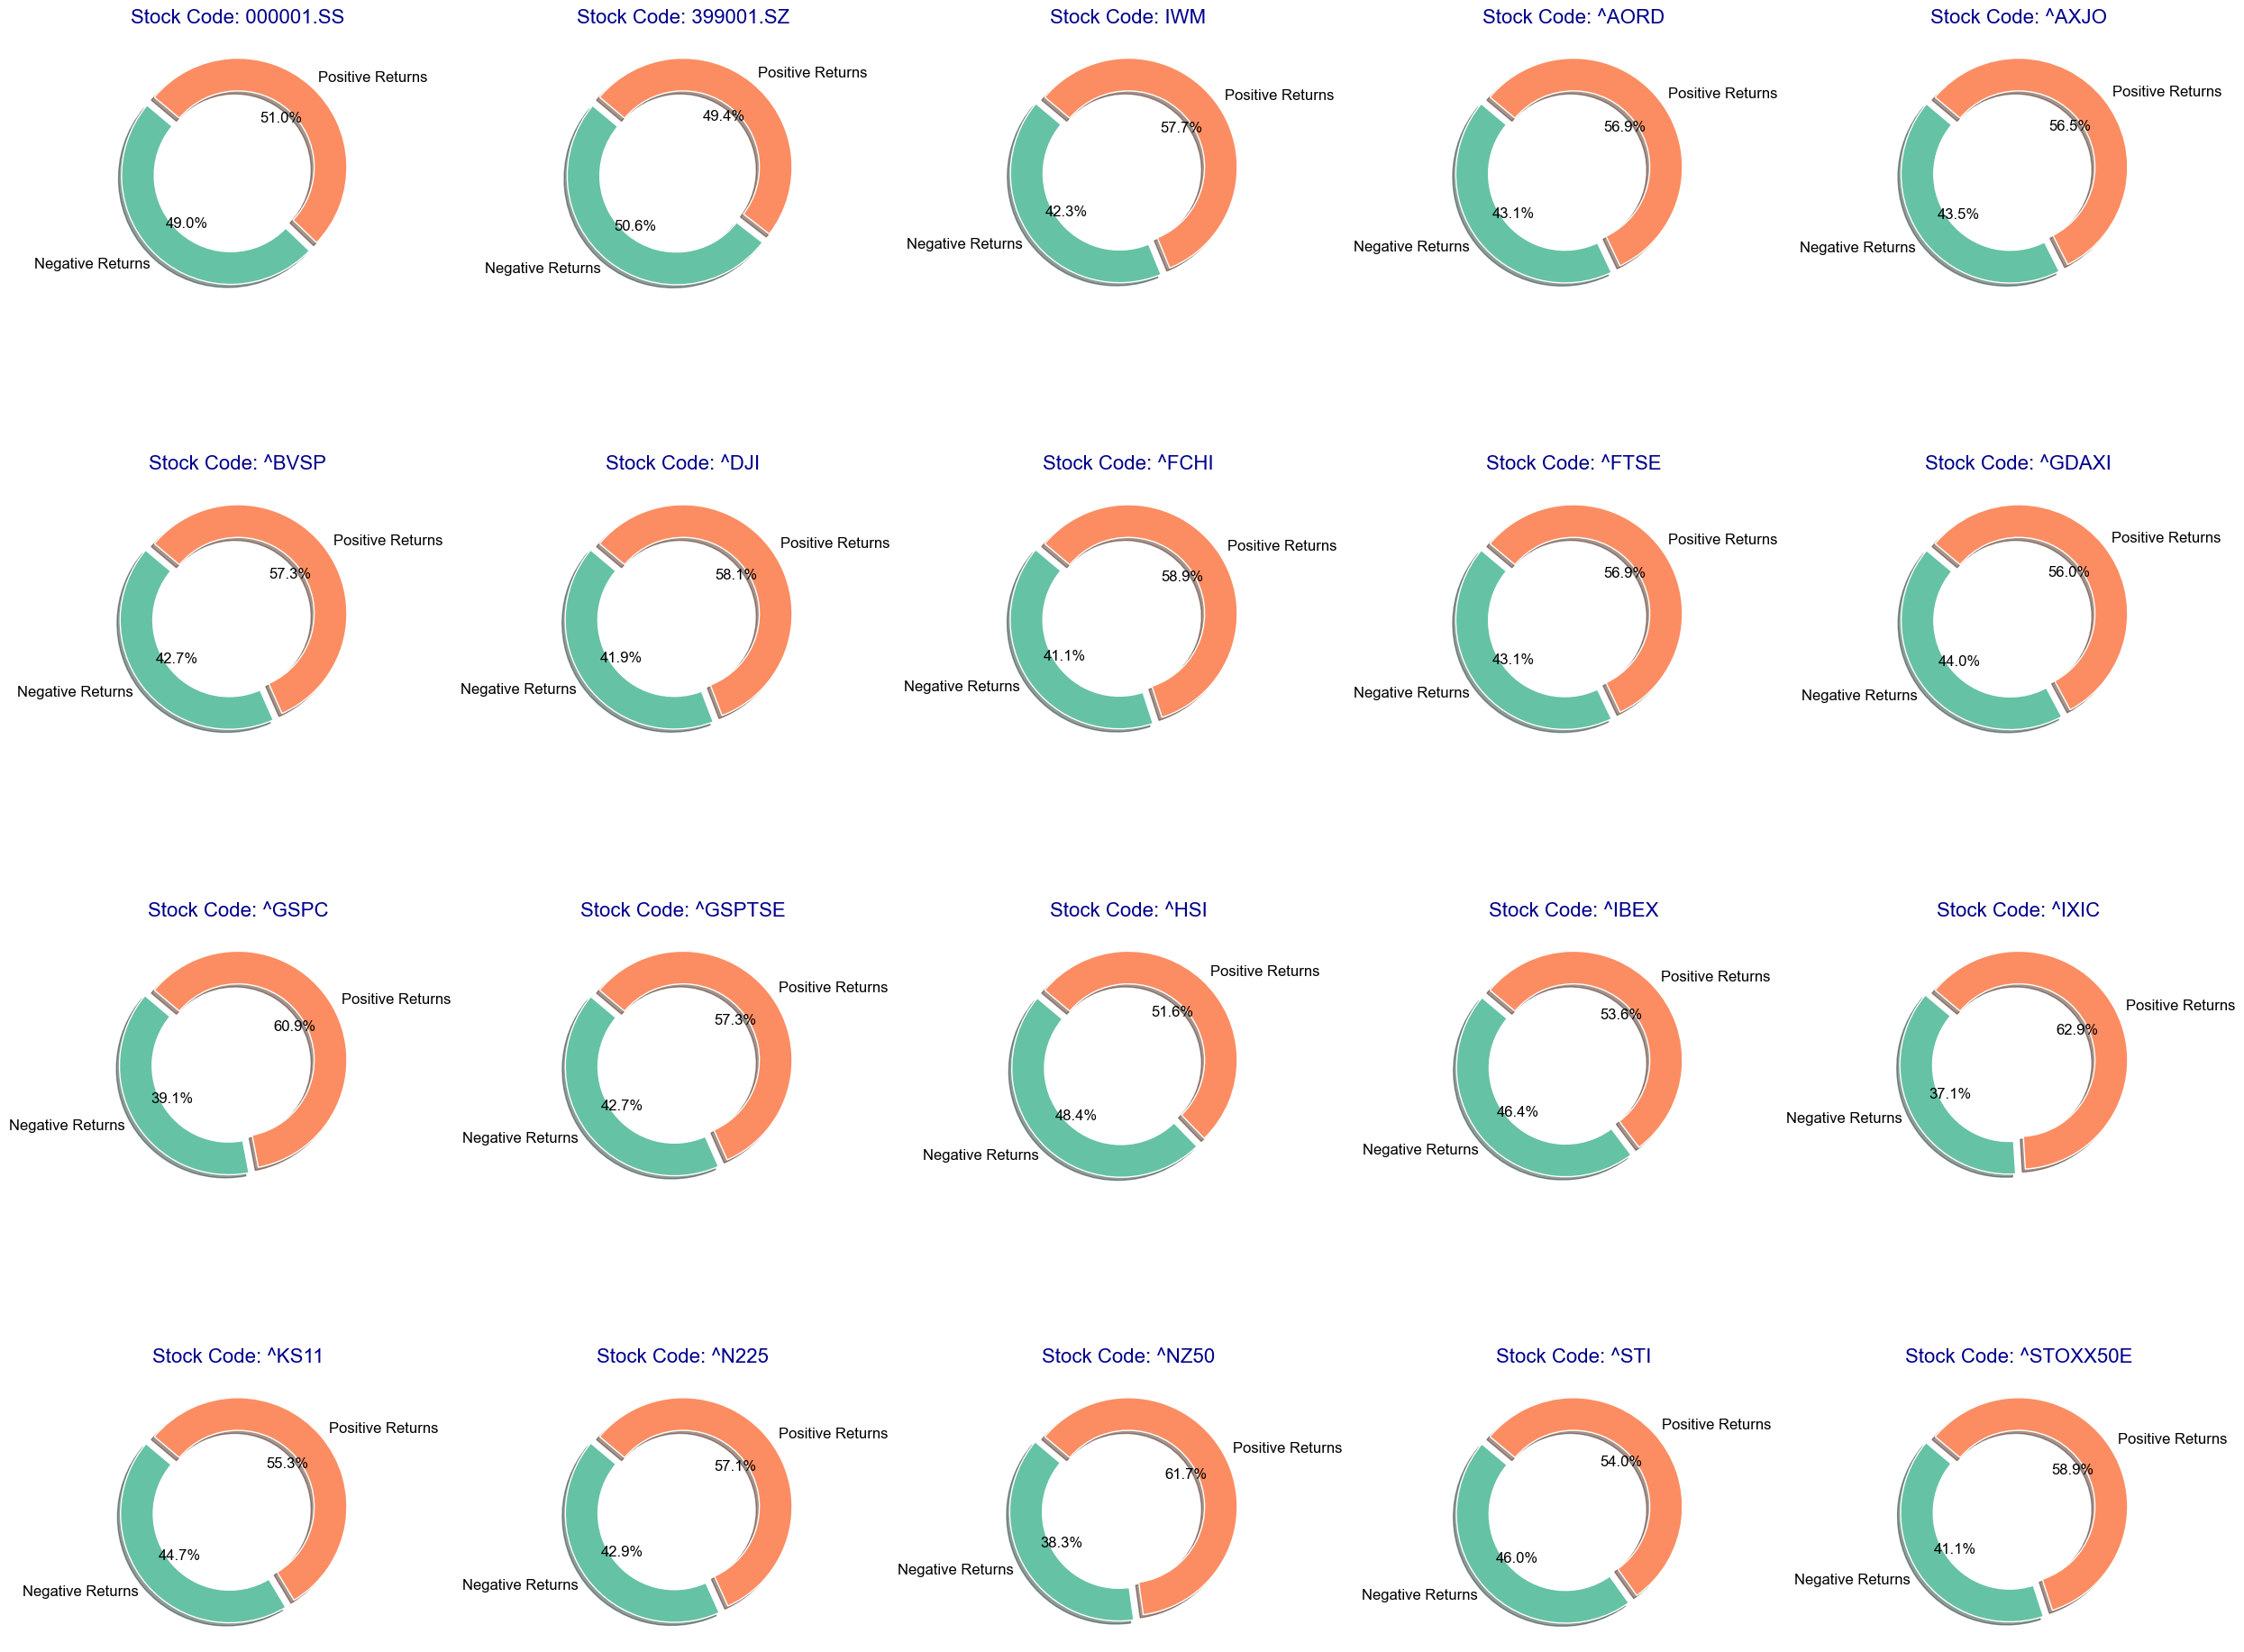

In [12]:
num_dataframes = len(dataframes)
rows, cols = 4, 5

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
axes = axes.flatten() if num_dataframes > 1 else [axes]

for idx, data_df in enumerate(dataframes):
    df_cp = data_df.copy()
    df_cp['Rise'] = df_cp['Rise'].replace({0: 'Negative', 1: 'Positive'})
    
    # Counting positive and negative returns
    returns_counts = df_cp['Return'].apply(lambda x: 'Positive' if x >= 0 else 'Negative').value_counts()
    positive_count = returns_counts.get('Positive', 0)
    negative_count = returns_counts.get('Negative', 0)
    
    # Creating Pie Charts
    sizes = [negative_count, positive_count]
    labels = ['Negative Returns', 'Positive Returns']
    colors = ['#66c2a5', '#fc8d62']
    explode = (0.1, 0)
    
    ax = axes[idx]
    wedges, texts, autotexts = ax.pie(
        sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
        startangle=140, explode=explode, shadow=True, wedgeprops=dict(width=0.3)
    )
    
    for text in texts + autotexts:
        text.set_color('black')
        text.set_fontsize(12)
    
    stock_code = data_df['Stock Code'].iloc[0]
    ax.set_title(f'Stock Code: {stock_code}', fontsize=16, color='darkblue')

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
